In [14]:
#Import libraries
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import string
import nltk
import spacy
import matplotlib.pyplot as plt

In [15]:
#Import the dataset
df = pd.read_csv("transcriptions_2.csv") #transcriptions
df1=pd.read_csv("all_commercials_classified_filtered.csv") # Nice_categories

In [16]:
#Join the two datasets
df_total=pd.concat([df.set_index('commercial_id'),df1.set_index('commercial_id')], axis=1, join='inner') #Join on commercial_id
#Keep only the transcription with log_prob >=-0.5
df_total=df_total.loc[df_total['log_prob']>=-0.5]

#Remove all the Nan values of nice_class, they are marked by -1
df_total=df_total.loc[df_total['nice_class']>-1]

#Select only the columns of interest: transcriptions (of the descriptions) and nice_class
df_total.drop('title', axis=1, inplace=True)
df_total.drop('log_prob', axis=1, inplace=True)

df_total.head()

,transcription,nice_class,description,year,lustrum,duration_in_seconds,source,has_been_transcribed,palette_extracted
commercial_id,,,,,,,,,
_3siiuQ3kp0.s5,Nascere nuovo Fiorino Franco e Hugo stabilisco...,12,NaN,1993,1990_1994,31.0,mDeplo (YouTube),True,True
_LQYpDfplFE,"Caldo, benvenuto a tutti da questo fantastico ...",25,Vecchia pubblicità della Nike trovata su una V...,2004,2000_2004,60.0,Stefano Tamburini (YouTube),True,True
_qPReXLa870,La bottiglia Coca Cola con Piacento Alli. Chie...,32,Pubblicità Coca Cola spot 2015 anniversario,2015,2015_2019,30.0,SuperSpot (YouTube),True,True
_RIBAprIKQc,Sottotitoli creati dalla comunità Amara.org,14,Morellato in questa stagione celebra l’amore! ...,2014,2010_2014,16.0,Morellato (YouTube),True,True
_VxI8Bo64wQ.s5,"non c'è, non c'è ciao, o ci stai parlando? e.....",38,NaN,2000,2000_2004,31.0,mDeplo (YouTube),True,True


In [17]:
#Remove the punctuation from the transcriptions
def remove_punctuation(text):
    if pd.isna(text):
        return text
    punctuationfree="".join([i for i in str(text) if i not in string.punctuation])
    return punctuationfree

df_total['transcription'] = df_total['transcription'].apply(remove_punctuation)

In [18]:
#Apply the lower method to strings

df_total['transcription'] = df_total['transcription'].apply(lambda s: s.lower() if type(s) == str else s)

#Remove the stopwords
stop_words = stopwords.words('italian')
stopwords_plus=['cè', 'così', 'oh', 'eh', 'sì', 'to', 'po', 'già', 'mai', 'no', 'ce', 'ah', 'allora', 'me', 'doro']
for element in stopwords_plus:
    stop_words.append(element)
df_total['transcription'] = df_total['transcription'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))

In [19]:
#Grouping all by lustrum
dictionary =df_total.groupby('lustrum')['transcription'].apply(list).to_dict()
dictionary['1990_1994']

['nascere nuovo fiorino franco hugo stabiliscono nuovo record divano lungo giulio pietro luigi bruno nuovo record sollevamento jukebox categoria massima anne silvio battono record pianta alto nicola teo va nuovo record formaggio senza ostacoli irene piero nuovo record torta tripla mentre nuovo record conforto largo stabilendo silvia daniele nuovo fiorino oggi record fiat fiorino nascere nuovo fiorino',
 'visto riso grandi cose adesso addirittura sottovuoto riso scotti viene raccolto lavorato protetto sotto vuoto conserva fresco pieno gusto risaia tavola bello buono dottor scotti ormai sanno giovane riso scotti sottovuoto riso sempre giovane sottotitoli creati comunità amaraorg',
 'one two three vision future formula vision vanità',
 'punt mes carpano',
 'macchie vino inutile può capitare usa ace detersivo candeggiante perchè ace detersivo lazione smacchiante candeggiante guarda sporco pulito tradizionale ecco pulito ace detersivo pulito stupendo bucato certo ace ace detersivo candeggia

In [20]:
#Transform the value lists into strings
for key, value in dictionary.items():
    dictionary[key] = ' '.join(value)

In [21]:
for key in dictionary:
    dictionary[key] = dictionary[key].split(' ')
dictionary['1990_1994']

['nascere',
 'nuovo',
 'fiorino',
 'franco',
 'hugo',
 'stabiliscono',
 'nuovo',
 'record',
 'divano',
 'lungo',
 'giulio',
 'pietro',
 'luigi',
 'bruno',
 'nuovo',
 'record',
 'sollevamento',
 'jukebox',
 'categoria',
 'massima',
 'anne',
 'silvio',
 'battono',
 'record',
 'pianta',
 'alto',
 'nicola',
 'teo',
 'va',
 'nuovo',
 'record',
 'formaggio',
 'senza',
 'ostacoli',
 'irene',
 'piero',
 'nuovo',
 'record',
 'torta',
 'tripla',
 'mentre',
 'nuovo',
 'record',
 'conforto',
 'largo',
 'stabilendo',
 'silvia',
 'daniele',
 'nuovo',
 'fiorino',
 'oggi',
 'record',
 'fiat',
 'fiorino',
 'nascere',
 'nuovo',
 'fiorino',
 'visto',
 'riso',
 'grandi',
 'cose',
 'adesso',
 'addirittura',
 'sottovuoto',
 'riso',
 'scotti',
 'viene',
 'raccolto',
 'lavorato',
 'protetto',
 'sotto',
 'vuoto',
 'conserva',
 'fresco',
 'pieno',
 'gusto',
 'risaia',
 'tavola',
 'bello',
 'buono',
 'dottor',
 'scotti',
 'ormai',
 'sanno',
 'giovane',
 'riso',
 'scotti',
 'sottovuoto',
 'riso',
 'sempre',
 'gio

In [22]:
nlp = spacy.load("it_core_news_sm")

In [23]:
import nltk
nltk.download('words')
from nltk.corpus import words
word_list = words.words()

[nltk_data] Downloading package words to
[nltk_data]     /Users/denisebotrini/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [24]:
with open ('60000_parole_italiane.txt','r') as file:
    parole_italiane = file.read().splitlines()
    
    
lista=['fiat', 'rio', 'papa', 'illimitate', 'pandora', 'aloe', 'silicone', 'rondelle', 'parma', 'paolo', 'mila', 'flora', 'portatile', 'bronchi', 'barilla', 'tombola', 'equilibrio', 'pizzeria', 'qua', 'emma', 'camilla', 'pizzeria', 'papilla', 'radiale', 'laura', 'anna', 'colon', 'umbra', 'siciliana', 'colline', 'lira', 'soldi', 'delta', 'beta', 'panda', 'magnolia', 'balsamo', 'spaghetti', 'ravioli', 'turco', 'arena', 'assai', 'tornado', 'calorie', 'lazzaroni', 'saga', 'soldo', 'caffeina', 'banco', 'ducato', 'inferno', 'meteorite', 'prestissimo', 'fortissimo', 'cremone', 'ultra', 'pipi', 'plus', 'diva', 'lux', 'fiesta', 'appassionato', 'parabola', 'capriccio', 'bu', 'de', 'coop', 'capsule', 'mar', 'mu', 'lire', 'pour', 'coca', 'bon', 'bien', 'nu', 'nuovi', 'macchie', 'giorno', 'caffé', 'attira', 'vinci', 'massima', 'potenza', 'nuovo', 'mondo', 'ta', 'pensato', 'fantastici', 'effetti', 'sonori', 'sonore', 'ricaricabile', 'ricaricabili', 'macchie', 'efficacia', 'na', 'unico', 'protezione', 'sport', 'stress', 'ultima', 'testa', 'scopri', 'credito', 'vedete', 'trovi', 'mostre', 'bustina', 'rivoluzionario', 'seguire', 'alpine', 'scarpine', 'dà', 'fuori', 'marocco', 'ogni', 'nuovo', 'prossimi', 'conquista', 'anni', 'glug', 'partite', 'cola', 'scopri', 'passi', 'bustina', 'tabellone', 'stile', 'spot', 'sempre', 'vera', 'grande', 'cho', 'mal', 'testa', 'nocciola', 'macchiare', 'gormitico', 'hey', 'impone', 'pina', 'sanpellegrino', 'pan', 'uhuh', 'maria', 'menu', 'wow']

stopwords = stopwords.words('english')

In [25]:
english_words=list()
for index in range(len(word_list)):
    if word_list[index] not in parole_italiane:
        english_words.append(word_list[index])
    else:
        continue

In [26]:
#Qui considero tutte le parole, anche quelle ripetute
dictionary1={}
for key in dictionary:
    for index in range(len(dictionary[key])):
         if dictionary[key][index] not in english_words or dictionary[key][index] in lista or dictionary[key][index] in stopwords:
             continue
         else:
            if key not in dictionary1:
              dictionary1[key]= dictionary[key][index]
            else: 
              dictionary1[key]+= ' ' +dictionary[key][index]

In [27]:
for key in dictionary1:
    print(key,':', len(dictionary1[key].split(' ')) )

1980_1984 : 33
1985_1989 : 380
1990_1994 : 255
1995_1999 : 75
2000_2004 : 141
2005_2009 : 305
2010_2014 : 105
2015_2019 : 104
2020_2024 : 80


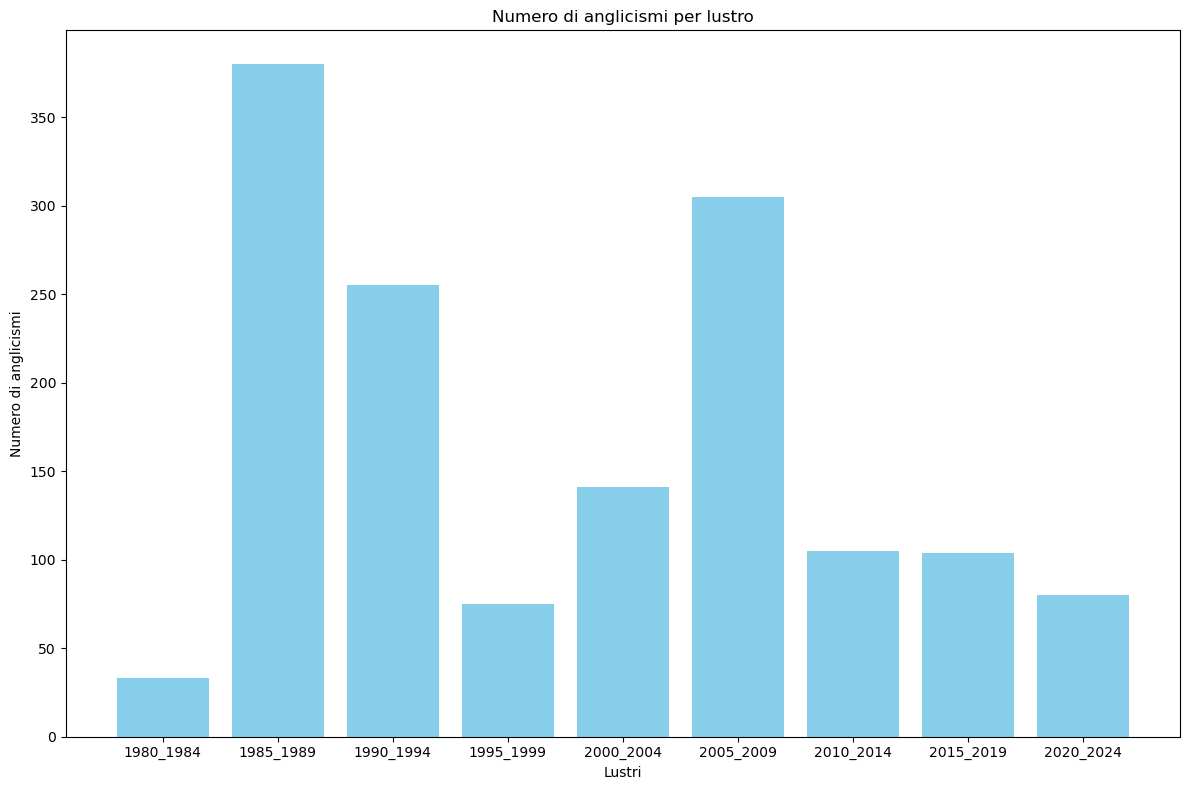

In [28]:
class_labels = list(dictionary1.keys())
word_counts = [len(value.split(' ')) for value in dictionary1.values()]

# Creazione del grafico a barre
plt.figure(figsize=(12, 8))
plt.bar(class_labels, word_counts, color='skyblue')

# Aggiungi etichette e titolo
plt.xlabel('Lustri')
plt.ylabel('Numero di anglicismi')
plt.title('Numero di anglicismi per lustro')
plt.xticks(class_labels)  # Mostra tutte le classi sull'asse x
plt.tight_layout()  # Ottimizza il layout per evitare sovrapposizioni

# Mostra il grafico
plt.show()

In [29]:
#Per ogni chiave considero il set di parole 
dictionary2 = {}

for key in dictionary1:
    words = dictionary1[key].split()
    unique_words = set(words)
    dictionary2[key] = ' '.join(unique_words)

for key in dictionary2:
    print(key,':', len(dictionary2[key].split(' ')) )

1980_1984 : 5
1985_1989 : 85
1990_1994 : 105
1995_1999 : 49
2000_2004 : 79
2005_2009 : 156
2010_2014 : 73
2015_2019 : 74
2020_2024 : 36


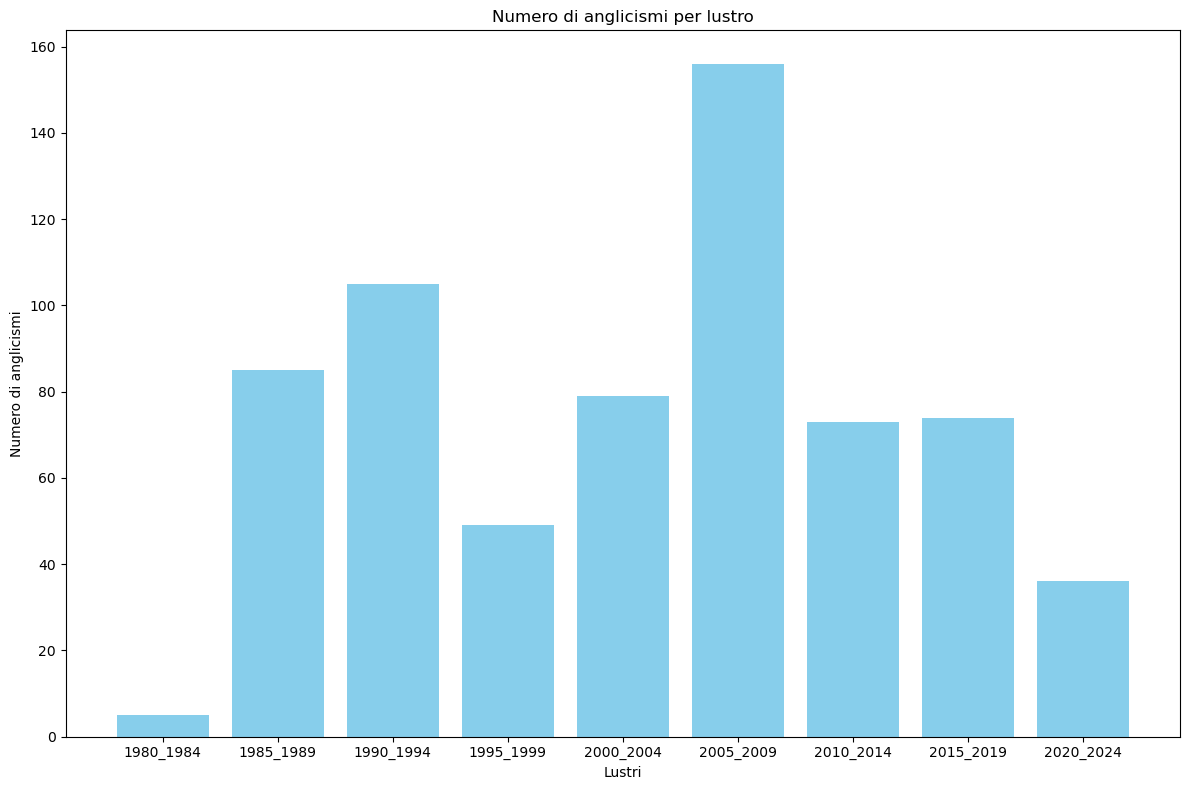

In [30]:
class_labels = list(dictionary2.keys())
word_counts = [len(value.split(' ')) for value in dictionary2.values()]

# Creazione del grafico a barre
plt.figure(figsize=(12, 8))
plt.bar(class_labels, word_counts, color='skyblue')

# Aggiungi etichette e titolo
plt.xlabel('Lustri')
plt.ylabel('Numero di anglicismi')
plt.title('Numero di anglicismi per lustro')
plt.xticks(class_labels)  # Mostra tutte le classi sull'asse x
plt.tight_layout()  # Ottimizza il layout per evitare sovrapposizioni

# Mostra il grafico
plt.show()

In [31]:
frequencies = dict()
for key in dictionary:
    frequencies[key] = Counter(dictionary1[key].split(' '))

top = 10
previous_key = None

for key in sorted(dictionary):
    if key != previous_key and previous_key is not None:
        print()
    previous_key = key
    words_top = sorted(frequencies[key].items(), key=lambda x: x[1], reverse=True)[:20]
    for word, frequency in words_top:
        print(key, word, frequency, sep='\t')

1980_1984	scotch	28
1980_1984	arna	2
1980_1984	chili	1
1980_1984	principal	1
1980_1984	scot	1

1985_1989	red	223
1985_1989	fruit	8
1985_1989	sprinter	7
1985_1989	line	7
1985_1989	center	7
1985_1989	love	6
1985_1989	give	6
1985_1989	comes	6
1985_1989	feeling	5
1985_1989	el	4
1985_1989	go	3
1985_1989	fantasy	3
1985_1989	taste	3
1985_1989	saco	3
1985_1989	tag	2
1985_1989	arna	2
1985_1989	four	2
1985_1989	rover	2
1985_1989	shampoo	2
1985_1989	sandman	2

1990_1994	got	72
1990_1994	music	8
1990_1994	baby	8
1990_1994	ax	7
1990_1994	ace	6
1990_1994	sensor	6
1990_1994	funny	5
1990_1994	box	5
1990_1994	like	4
1990_1994	best	4
1990_1994	gig	4
1990_1994	aa	4
1990_1994	blue	3
1990_1994	tiger	3
1990_1994	el	3
1990_1994	es	3
1990_1994	one	2
1990_1994	vision	2
1990_1994	magical	2
1990_1994	mystery	2

1995_1999	check	5
1995_1999	mystic	4
1995_1999	flipper	3
1995_1999	ring	3
1995_1999	flix	3
1995_1999	blockbuster	3
1995_1999	help	3
1995_1999	way	3
1995_1999	parker	2
1995_1999	eternity	2
1995_1999	ice	2


## Lustra and Nice_class

In [32]:
#Grouping all by nice_class and lustrum
dictionary = {}
for i, g in df_total.groupby(['nice_class', 'lustrum']):
    if i not in dictionary:
        dictionary[i] = g['transcription'].tolist()  
    else:
        dictionary[i].extend(g['transcription'].tolist())
        
dictionary

{(3,
  '1980_1984'): ['nelsen piatti nelsen piatti vuol lavare sapevo ecco qua nelsen piatti prodotto concentrato solubile scioglie subito spreca nelsen piatti conveniente confezioni due cinque chili dichiarati puliti problemi spazio nelsen piatti condensato chilo comodo piccolissimo vale chilo tipo normale nelsen piatti piace sottotitoli creati comunità amaraorg', 'sintony sintony sintony sintony sintony sintony sintony sintony sintony sintony sintony sintony sintony sintony sintony sintony sintony sintony sintony sintony sintony sintony sintony sintony sintony sintony sintony sintony sintony sintony sintony sintony', 'qual donna cura pelle lux schiuma cremosa rende pelle luminosa morbida ecco lux prima cura bellezza certo bella pelle fa essere molto bella uso lux victoria principal usa lux'],
 (3,
  '1985_1989'): ['tartaro deriva principalmente placca batterica indurita oggi neo mentadent p dentifricio azione antibatterica accresciute efficace infatti componenti attivi neo mentadent 

In [33]:
for key, value in dictionary.items():
    dictionary[key] = ' '.join(value)

In [34]:
for key in dictionary:
    dictionary[key] = dictionary[key].split(' ')
dictionary[28.0, '1990_1994'] #example

['puoi',
 'fare',
 'te',
 'giri',
 'insieme',
 'due',
 'liberi',
 'mondo',
 'birba',
 'dolce',
 'cucciolo',
 'birba',
 'birba',
 'fermo',
 'birba',
 'amico',
 'gig',
 'gig',
 'tiger',
 'porta',
 'tasca',
 'sala',
 'giochi',
 'famosi',
 'videogames',
 'tascabili',
 'videogiochi',
 'terminator',
 'misurati',
 'linvasione',
 'terminator',
 'banda',
 'cyborg',
 'double',
 'dragon',
 '3',
 'missione',
 'terra',
 'faraoni',
 'dentro',
 'chris',
 'bilingue',
 'hard',
 'driving',
 'volante',
 'potente',
 'auto',
 'corso',
 'ostacoli',
 'imprevedibili',
 'divertimento',
 'continua',
 'spiderman',
 'megaman',
 '3',
 'street',
 'fighter',
 'robin',
 'hood',
 'gig',
 'tiger',
 'gig',
 'tiger',
 'porti',
 'tasca',
 'tutta',
 'lemozione',
 'unintera',
 'sala',
 'giochi',
 'tascabili',
 'baby',
 'baby',
 'biberon',
 'fa',
 'solo',
 'baby',
 'biberon',
 'magico',
 'baby',
 'biberon',
 'bambolotto',
 'ride',
 'piange',
 'beve',
 'dopo',
 'fa',
 'rutino',
 'baby',
 'baby',
 'biberon',
 'fa',
 'solo',
 '

In [35]:
dictionary1={}
for key in dictionary:
    for index in range(len(dictionary[key])):
         if dictionary[key][index] not in english_words or dictionary[key][index] in lista or dictionary[key][index] in stopwords:
             continue
         else:
            if key not in dictionary1:
              dictionary1[key]= dictionary[key][index]
            else: 
              dictionary1[key]+= ' ' +dictionary[key][index]

In [36]:
for key in dictionary1:
    print(key, ':', len(dictionary1[key].split(' ')))

(3, '1980_1984') : 2
(3, '1985_1989') : 14
(3, '1990_1994') : 39
(3, '1995_1999') : 2
(3, '2000_2004') : 4
(3, '2005_2009') : 67
(3, '2015_2019') : 11
(3, '2020_2024') : 8
(5, '1985_1989') : 26
(5, '1990_1994') : 2
(5, '2005_2009') : 2
(5, '2010_2014') : 6
(5, '2015_2019') : 1
(8, '1985_1989') : 2
(8, '1990_1994') : 6
(9, '1985_1989') : 5
(9, '1990_1994') : 11
(9, '1995_1999') : 1
(9, '2000_2004') : 1
(9, '2005_2009') : 7
(12, '1980_1984') : 2
(12, '1985_1989') : 4
(12, '1990_1994') : 98
(12, '1995_1999') : 4
(12, '2000_2004') : 50
(12, '2005_2009') : 68
(12, '2010_2014') : 57
(12, '2015_2019') : 27
(12, '2020_2024') : 21
(14, '2005_2009') : 28
(14, '2010_2014') : 15
(16, '1990_1994') : 4
(16, '1995_1999') : 1
(16, '2000_2004') : 9
(16, '2005_2009') : 3
(18, '2015_2019') : 2
(25, '1985_1989') : 7
(25, '1995_1999') : 2
(25, '2000_2004') : 6
(25, '2005_2009') : 43
(25, '2010_2014') : 1
(25, '2015_2019') : 2
(25, '2020_2024') : 18
(28, '1985_1989') : 10
(28, '1990_1994') : 25
(28, '1995_1

In [37]:
print('nice_class 29:')
print()
print('1980_1984:',len(dictionary1[29.0, '1980_1984'].split(' ')))
print('1985_1989:',len(dictionary1[29.0, '1985_1989'].split(' ')))
print('2000_2004:',len(dictionary1[29.0, '2000_2004'].split(' ')))
print('2005_2009:',len(dictionary1[29.0, '2005_2009'].split(' ')))
print('2015_2019:',len(dictionary1[29.0, '2015_2019'].split(' ')))
print('2020_2024:',len(dictionary1[29.0, '2020_2024'].split(' ')))

nice_class 29:



KeyError: (29.0, '1980_1984')

In [ ]:
print('nice_class 30:')
print()
print('1980_1984:',len(dictionary1[30.0, '1980_1984'].split(' ')))
print('1985_1989:',len(dictionary1[30.0, '1985_1989'].split(' ')))
print('2000_2004:',len(dictionary1[30.0, '2000_2004'].split(' ')))
print('2005_2009:',len(dictionary1[30.0, '2005_2009'].split(' ')))
print('2015_2019:',len(dictionary1[30.0, '2015_2019'].split(' ')))
print('2020_2024:',len(dictionary1[30.0, '2020_2024'].split(' ')))

In [ ]:
print('nice_class 28:')
print()
print('1980_1984:',len(dictionary1[28.0, '1980_1984'].split(' ')))
print('1985_1989:',len(dictionary1[28.0, '1985_1989'].split(' ')))
print('2000_2004:',len(dictionary1[28.0, '2000_2004'].split(' ')))
print('2005_2009:',len(dictionary1[28.0, '2005_2009'].split(' ')))
print('2015_2019:',len(dictionary1[28.0, '2015_2019'].split(' ')))
print('2020_2024:',len(dictionary1[28.0, '2020_2024'].split(' ')))

## NGrams and Lustra

In [ ]:
#Grouping all by lustrum
dictionary =df_total.groupby('lustrum')['transcription'].apply(list).to_dict()
for key, value in dictionary.items():
    dictionary[key] = ' '.join(value)

for key in dictionary:
    dictionary[key] = set(nltk.ngrams(nltk.word_tokenize(dictionary[key]),3))
dictionary['1990_1994']

In [ ]:
#Selecting only the sets with english sentences
dictionary1={}
for key in dictionary:
 for element in (dictionary[key]):
    for index in range(len(element)):
          if element[index] not in english_words or element[index] in lista or element[index] in stopwords or element[index-1] not in english_words or element[index-1] in lista or element[index-1] in stopwords or element[index-2] not in english_words or element[index-2] in lista or element[index-2] in stopwords:
               continue
          else:
            if key not in dictionary1:
              dictionary1[key]= element[index]
            else:
              dictionary1[key]+= ' ' +element[index]

dictionary1

In [ ]:
dictionary2={}
for key in dictionary1:
    dictionary2[key]=set(dictionary1[key].split(' '))

In [ ]:
for key in dictionary2:
  print(key, ':',  len(dictionary2[key]))

## Nice class

In [ ]:
#Grouping all by Nice class
dictionary =df_total.groupby('nice_class')['transcription'].apply(list).to_dict()

In [ ]:
#Transform the value lists into strings
for key, value in dictionary.items():
    dictionary[key] = ' '.join(value)

In [ ]:
for key in dictionary:
    dictionary[key] = dictionary[key].split(' ')

In [ ]:
english_words=list()
for index in range(len(word_list)):
    if word_list[index] not in parole_italiane:
        english_words.append(word_list[index])
    else:
        continue

In [ ]:
#Qui considero tutte le parole, anche quelle ripetute
dictionary1={}
for key in dictionary:
    for index in range(len(dictionary[key])):
         if dictionary[key][index] not in english_words or dictionary[key][index] in lista or dictionary[key][index] in stopwords:
             continue
         else:
            if key not in dictionary1:
              dictionary1[key]= dictionary[key][index]
            else: 
              dictionary1[key]+= ' ' +dictionary[key][index]

In [ ]:
for key in dictionary1:
    print(key,':', len(dictionary1[key].split(' ')) )

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
class_labels = list(dictionary1.keys())
word_counts = [len(value.split(' ')) for value in dictionary1.values()]

# Creazione del grafico a barre
plt.figure(figsize=(12, 8))
plt.bar(class_labels, word_counts, color='skyblue')

# Aggiungi etichette e titolo
plt.xlabel('Classe  di Nizza')
plt.ylabel('Numero di anglicismi')
plt.title('Numero di anglicismi per Classe di Nizza')
plt.xticks(class_labels)  # Mostra tutte le classi sull'asse x
plt.tight_layout()  # Ottimizza il layout per evitare sovrapposizioni

# Mostra il grafico
plt.show()

In [ ]:
#Per ogni chiave considero il set di parole 
dictionary2 = {}

for key in dictionary1:
    words = dictionary1[key].split()
    unique_words = set(words)
    dictionary2[key] = ' '.join(unique_words)

for key in dictionary2:
    print(key,':', len(dictionary2[key].split(' ')) )

In [ ]:
class_labels = list(dictionary2.keys())
word_counts = [len(value.split(' ')) for value in dictionary2.values()]

# Creazione del grafico a barre
plt.figure(figsize=(12, 8))
plt.bar(class_labels, word_counts, color='skyblue')

# Aggiungi etichette e titolo
plt.xlabel('Classe  di Nizza')
plt.ylabel('Numero di anglicismi')
plt.title('Numero di anglicismi per Classe di Nizza')
plt.xticks(class_labels)  # Mostra tutte le classi sull'asse x
plt.tight_layout()  # Ottimizza il layout per evitare sovrapposizioni

# Mostra il grafico
plt.show()